In [ ]:
""" 
1/3/24 - Old code, where originally developed popuilations analyses (PCA plots, scalar) and (decode)
- PCA plots --> analy_pca_plot.py
- decode --> Still not moved

OLD NOTES:
Focus on prims (isolated) plotted in low-D represnetation, any structure,
and decoding, etc.

220714 - Extracted this from the quickanaly_220603 notebook
"""

##### Load neural and beh data (pending: cam)


In [1]:
from neuralmonkey.classes.session import Session
import matplotlib.pyplot as plt
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper

##### Single prims

In [4]:
DATE = "220715"
dataset_beh_expt = "priminvar3"
animal = "Pancho"

PREFIX_SAVE = "k99rebut"
# DATE = "220716"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

# DATE = "220717"
# dataset_beh_expt = "priminvar3"
# animal = "Pancho"

##### mult prims in grid

In [ ]:
DATE = "221107"
dataset_beh_expt = "dirfullvar1b"
animal = "Pancho"


##### Load data 

Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*220715*/**
Found this many paths:
2
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220715/Pancho-220715-154205
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220715/Pancho-220715-170247
session:  0
1
2
Beh Sessions that exist on this date:  {'220715': [(1, 'priminvar3'), (2, 'priminvar3')]}
taking this beh session: 1
Loading these beh expts: ['priminvar3']
Loading these beh sessions: [1]
Loading this neural session: 0
Searching using this string:
/mnt/hopfield_data01/ltian/recordings/*Pancho*/*220715*/**
Found this many paths:
2
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220715/Pancho-220715-154205
---
/mnt/hopfield_data01/ltian/recordings/Pancho/220715/Pancho-220715-170247
{'filename_components_hyphened': ['Pancho', '220715', '154205'], 'basedirs': ['/mnt/hopfield_data01/ltian/recordings/Pancho', '/mnt/hopfield_data01/ltian/recordings/Pancho/220715'], 'basedirs_filenames': ['220715', 'Pancho-220715-

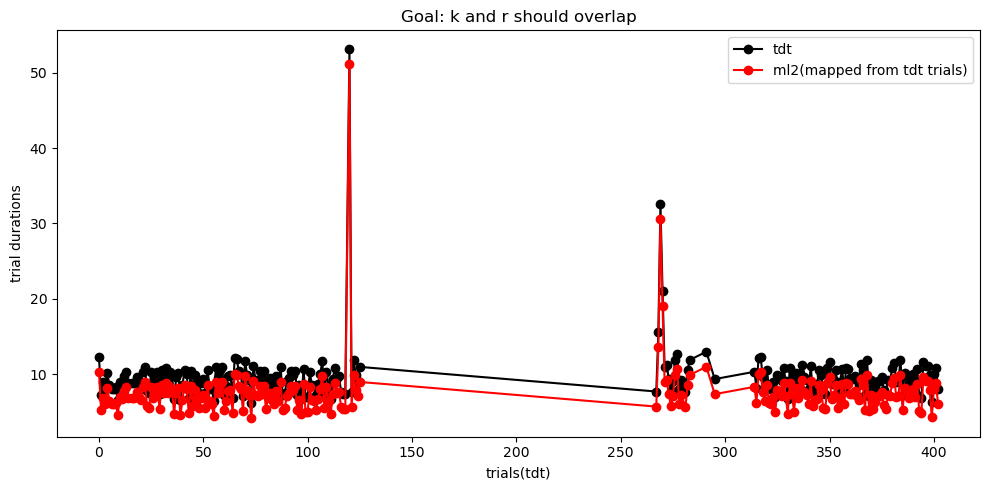

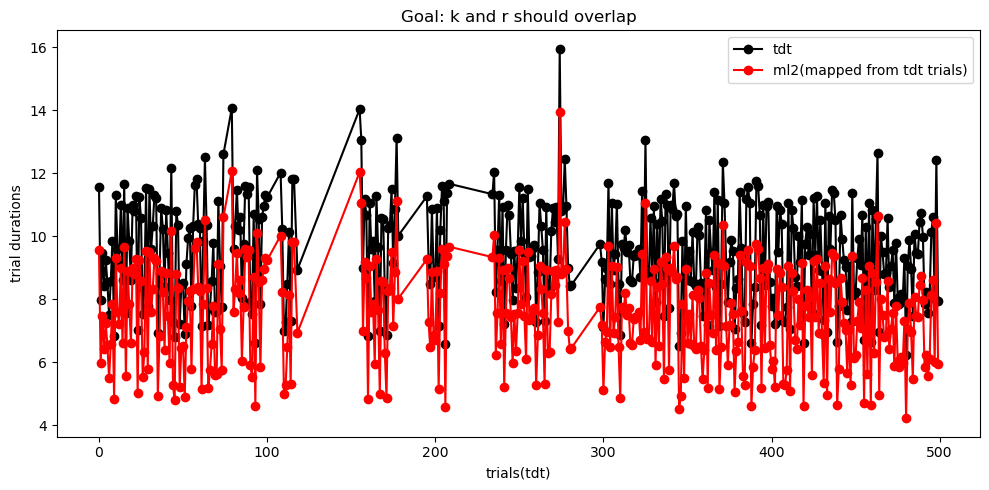

In [6]:
# MS = load_mult_session_helper(DATE, animal, dataset_beh_expt)
MS = load_mult_session_helper(DATE, animal)
    
    
animal = "Pancho"
# SAVEDIR = f"/data2/analyses/recordings/NOTEBOOKS/220713_prims_state_space/{animal}/{DATE}"
if PREFIX_SAVE is None:
    SAVEDIR = f"/gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/{animal}/{DATE}"
else:
    SAVEDIR = f"/gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/{animal}/{DATE}_{PREFIX_SAVE}"
    

import os
print(SAVEDIR)

In [13]:
# [OPTIONAL] import dataset
for sn in MS.SessionsList:
    sn.datasetbeh_load_helper(dataset_beh_expt)

# Get dataset
# D = MS.datasetbeh_extract()

Searching using this string:
/gorilla1/analyses/database/*Pancho-*priminvar3-*null-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/gorilla1/analyses/database/BEH/*Pancho-*priminvar3-*null-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
4
---
/gorilla1/analyses/database/BEH/Pancho-priminvar3-null-220718_104922
---
/gorilla1/analyses/database/BEH/Pancho-priminvar3-null-220719_100125
---
/gorilla1/analyses/database/BEH/Pancho-priminvar3-null-220801_085350
---
/gorilla1/analyses/database/BEH/Pancho-priminvar3-null-221207_202421
----------------
Currently loading dataset pkl: /gorilla1/analyses/database/BEH/Pancho-priminvar3-null-221207_202421
.. Done!
Loaded metadat:
{'sketchpad_edges': array([[-311.84, -224.8 ],
       [ 311.84,  429.6 ]]), 'metadat_probedat': {'sdate': 220715, 'edate': 220724, 'strokmodel_kind': None, 'strokmodel_tstamp': None, 'datecategories': {'220715': 1, '220716': 1, '220717': 1, '220718': 1, '220

resetting index
Updated columns: insummarydates, using Metadats
Searching using this string:
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-priminvar3-null-all/*Tasks*pkl
Found this many paths:
1
---
/gorilla1/analyses/database/TASKS_GENERAL/Pancho-priminvar3-null-all/Tasks.pkl
--- Loading tasks pkl file:  /gorilla1/analyses/database/TASKS_GENERAL/Pancho-priminvar3-null-all/Tasks.pkl
added new column self.Dat[Task]
- starting/ending len (grouping params):
4550
4550
- starting/ending len (getting sequence):
4550
4550
--- Removing nans
start len: 4550
- num names for each col
not removing nans, since columns=[]
Reassigned train/test, using key: probe
and values:
Train =  [0]
Test =  [1]
 
New distribution of train/test:
train    4550
Name: monkey_train_or_test, dtype: int64
Appended column: los_info
Appended self.Dat[superv_SEQUENCE_SUP]
Appended self.Dat[superv_SEQUENCE_ALPHA]
Appended self.Dat[superv_COLOR_ON]
Appended self.Dat[superv_COLOR_METHOD]
Appended self.Dat[superv_GUIDEDYN_O

#### Print summaries of datasets

In [ ]:
# print summary:
for i, sn in enumerate(MS.SessionsList):
    print("\n====== SESSION NUM: ", i)
    sn.sitegetter_print_summary_nunits_by_region()


### Extract neural data snippets aligned to onset of each stroke.

Each stroke also extract beh and task features


In [ ]:
# Extract all strokes, as bag of strokes.
from pythonlib.dataset.dataset_strokes import DatStrokes
DS = DatStrokes(D)

DS.clean_data(["remove_if_multiple_behstrokes_per_taskstroke"])

# Extract timing inforamtion (e.g., stroek onsets, offsets)
DS.timing_extract_basic()


# This dsitribution of task kinds... (print)

list_keys = ["task_kind", "gridsize", "shape_oriented", "gridloc"]
for key in list_keys:
    print(" ")
    print("--- Unique levels for this category: ", key)
    print(DS.Dat[key].value_counts())
    

##### Clean up trials

In [ ]:
# Clean up 
# 0) clean behavior
# --- only prims in grid

filtdict = {"task_kind":["prims_single", "prims_on_grid"]}
filtdict = {"task_kind":["prims_single", "prims_on_grid"]}
DS.filter_dataframe(filtdict)

In [ ]:
# Only keep datra with specific gridsize
# F = {"gridsize":["rig3_3x3_bigger", "rig3_3x3_smallestest"]}
# DS.Dat = filterPandas(DS.Dat, F)
DS.Dat = DS.Dat[DS.Dat["gridsize"].isin(["rig3_3x3_bigger", "rig3_3x3_smallestest"])].reset_index(drop=True)

In [ ]:
# 3) WIthin each shape, remove strokes that are outliers (e..g, done in wrong direction)
assert False, "make a copy, or else preprocess will change strokes permanently"
shapedict = DS.grouping_get_inner_items()
for shape, inds in shapedict.items():
    # get sim matrix
    DS.cluster_compute_sim_matrix(inds, do_preprocess=False)
    adsf

In [ ]:
DS.Dat = df

In [ ]:
df = DS.Dat.copy()

In [ ]:
### 1) Only keep levels that have enough trials
from pythonlib.tools.pandastools import filter_by_min_n

n_min_per_level = 20 # min total n trials for level
DATAPLOT_GROUPING_VARS = ['shape_oriented', 'gridloc', 'gridsize']
for grp in DATAPLOT_GROUPING_VARS:
    print("====", grp)
    df = filter_by_min_n(df, grp, n_min_per_level)
    
#     levels = DS.Dat[grp].unique()
    
#     for lev in levels:
#         n = sum(DS.Dat[grp]==lev)
#         if n<n_min_per_level:
#             # then remove it
#             inds = DS.Dat[DS.Dat[grp]==lev].index.tolist()
#             indstoremove.extend(inds)
#             print(f'REMOVING, n={n} |', lev, ' --------  ', sum(DS.Dat[grp]==lev))
#         print(lev, ' --------  ', sum(DS.Dat[grp]==lev))
# print('removing this many indices: ', len(set(indstoremove)))
# DS.Dat = DS.Dat.drop(indstoremove).reset_index(drop=True)

##### Final counts for each conjuctive level

In [ ]:

DATAPLOT_GROUPING_VARS = ['shape_oriented', 'gridloc', 'gridsize']
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items
groupdict = grouping_append_and_return_inner_items(DS.Dat, DATAPLOT_GROUPING_VARS)

# print summary
for grp, inds in groupdict.items():
    print(grp, ' ----- ' , len(inds))
    
print("  ")
print("This many groups:")
print(len(groupdict))

### PLOT - behavior, each stroke

In [ ]:
sdir_beh = f"{SAVEDIR}/behavior"
os.makedirs(sdir_beh, exist_ok=True)
print("Made this dir to save plots: ", sdir_beh)

In [ ]:
# sort

groupdict = {key:groupdict[key] for key in sorted(groupdict.keys())}


### [GOOD] Plots of behavior, grouped

In [ ]:
def _grp_to_str(grp):
    return "__".join([str(g) for g in grp])
     
# Print distrubutions of categories
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items
groupdict = grouping_append_and_return_inner_items(DS.Dat, DATAPLOT_GROUPING_VARS)

from pythonlib.tools.expttools import writeDictToYaml
path = f"{sdir_beh}/groupdict_all_orig.yaml"
writeDictToYaml(groupdict, path)

groupdict_str = {_grp_to_str(grp):inds for grp, inds in groupdict.items()}
path = f"{sdir_beh}/groupdict_all_str.yaml"
writeDictToYaml(groupdict_str, path)

groupdict_n = {grp:len(inds) for grp, inds in groupdict_str.items()}
path = f"{sdir_beh}/groupdict_n_all_str.yaml"
writeDictToYaml(groupdict_n, path)


In [ ]:
# One subplot overlaying for each group

from pythonlib.tools.plottools import subplot_helper

# 1) plot all
getax, figholder, nplots = subplot_helper(3, 8, len(groupdict), SIZE=4)
for i, (grp, inds) in enumerate(groupdict.items()):
    ax = getax(i)
    DS.plot_strokes_overlaid(inds, ax)
    ax.set_title(grp)
    fig.savefig(f"{sdir_beh}/strokes_grouped_all_{i}.pdf")


# 2) plot random subset
for it in range(3):
    nmax = 2;
    getax, figholder, nplots = subplot_helper(3, 8, len(groupdict), SIZE=4)
    for i, (grp, inds) in enumerate(groupdict.items()):
        ax = getax(i)
        DS.plot_strokes_overlaid(inds, ax, nmax=nmax)
        ax.set_title(grp)
    for i, x in enumerate(figholder):
        fig = x[0]
        fig.savefig(f"{sdir_beh}/strokes_grouped_random_{nmax}_{i}-iter_{it}.pdf")


In [ ]:
# figs = figholder[0]

for it in range(3):
    figholder = DS.plot_egstrokes_grouped_in_subplots(task_kind=None, n_examples=3)
    for i, x in enumerate(figholder):
        fig = x[0]
        fig.savefig(f"{sdir_beh}/datstrokes_egstrokes_grouped_subplots_{i}-iter_{it}.pdf")
        

### [GOOD] Plot all projections PCA 

In [ ]:
from neuralmonkey.analyses.prims_state_space import plotall_state_space_iter_hyperparams
DATAPLOT_GROUPING_VARS = ['shape_oriented', 'gridloc', 'gridsize']
LIST_PCA_AGG = [DATAPLOT_GROUPING_VARS] + [[x] for x in DATAPLOT_GROUPING_VARS]
# LIST_PCA_AGG = [
#     ["shape_oriented", "gridloc"],
#     ["shape_oriented"], 
#     ["gridloc"]]

LIST_REGIONS = [["M1_m", "M1_l"],
                ["PMd_a", "PMd_p"],
                ["dlPFC_p", "dlPFC_a"],
                ["vlPFC_p", "vlPFC_a"],
                ["SMA_p", "SMA_a"], 
                ["preSMA_p", "preSMA_a"],
                ["PMv_m", "PMv_l"],
                ["FP_p", "FP_a"], 
               None]

# - DIfferent subplots
LIST_VARNAMES_SUBPLOT = [
    [None, "gridsize"],
    [None, "gridloc"],
    [None, "shape_oriented"]]
for x in DATAPLOT_GROUPING_VARS:
    this = x
    others_conj = tuple([y for y in DATAPLOT_GROUPING_VARS if y!=x])
    LIST_VARNAMES_SUBPLOT.append([others_conj, this])
    
print("--- Making these plots:")
for x in LIST_VARNAMES_SUBPLOT:
    print(x)

    

plotall_state_space_iter_hyperparams(MS, DS, LIST_PCA_AGG, LIST_REGIONS, LIST_VARNAMES_SUBPLOT,
                                    DATAPLOT_GROUPING_VARS, SAVEDIR)

### [GOOD] DECODING

In [ ]:
LIST_REGIONS = [["M1_m", "M1_l"],
                ["PMd_a", "PMd_p"],
                ["dlPFC_p", "dlPFC_a"],
                ["vlPFC_p", "vlPFC_a"],
                ["SMA_p", "SMA_a"], 
                ["preSMA_p", "preSMA_a"], 
                ["PMv_m", "PMv_l"],
                ["FP_p", "FP_a"], 
               None]
LIST_ALIGN_TO = ["go_cue", "stroke_onset"]
# LIST_YFEAT = ["gridsize", "shape_oriented", "gridloc"]
LIST_YFEAT = ["gridsize", "shape_oriented", "gridloc"]
# LIST_NDIMS = [None, 15] # all, subset
LIST_NDIMS = [None] # all, subset
    
SAVEDIR_DECODE = f"/gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/{animal}/{DATE}/DECODE"
VERSION = "PCA"


pca_trial_agg_grouping=None
pca_trial_agg_method = None
pca_time_agg_method = None

In [ ]:
from neuralmonkey.analyses.prims_decode import decode_and_plot_iter_hyperparams

decode_and_plot_iter_hyperparams(MS, DS, LIST_REGIONS, LIST_ALIGN_TO, LIST_YFEAT, LIST_NDIMS,
    SAVEDIR_DECODE, VERSION, DATAPLOT_GROUPING_VARS, pca_trial_agg_grouping,
    pca_trial_agg_method, pca_time_agg_method)

##### [Debugging] Decode stuff above

In [ ]:
DATAPLOT_GROUPING_VARS_NOT_YFEAT = [var for var in DATAPLOT_GROUPING_VARS if var!=yfeat]
DfTrials = dftrials_centerize_by_group_mean(DfTrials, DATAPLOT_GROUPING_VARS_NOT_YFEAT)

DfTrials

In [ ]:
def convert_labelcode_to_name(yfeat, codenum):
    """ 
    PARAMS:
    - yfeat, str, then feature being predicted, e.g., shape_oriented
    - codenum, the integer code. 
    --- int
    """
    for name, num in MapVarToCat[yfeat].items():
        if num==codenum:
            return name
    print(yfeat, codenum)
    print(MapVarToCat)
    assert False, "didnt find it"


In [ ]:
##### Hyperparams optimization
if False:
    import random
    ntrials = len(DfTrials)
    inds = random.sample(range(len(DfTrials)), ntrials)
    yfeat = "shape_oriented"
    ndims = 12 # takes top n feature dimensions
    X, y = dftrials_slice_for_model(DfTrials, inds, yfeat, ndims)
    for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    #     print(C, _model_fit(X, y, model_params={"C":C}, do_train_test_split=True))
        print(C, _model_score(X, y, model_params={"C":C}, do_train_test_split=True, mean_score=True))



### (ANOVA AND OTHER PLOTS) - is there evidence for differences in activity across features?

### ANOVA PLOTS for SEQUENCEING

In [ ]:
# Extract params for each trial
sn = MS.SessionsList[0]
D = sn.Datasetbeh

# 1) Convert to dataset strokes (task variant)
from pythonlib.dataset.dataset_strokes import DatStrokes
# DSbeh = DatStrokes(D, version="beh")
DStask = DatStrokes(D, version="task") 

In [ ]:
# 1) only prims in grid
DStask.dataset_append_column("supervision_stage_concise")
filtdict = {"task_kind":["prims_on_grid"], "supervision_stage_concise":["off|1|solid|0"]}
DStask.filter_dataframe(filtdict, True)

In [ ]:
assert False, "see D.seqcontext..."
# Method 1 - level of trial
# for each trial, extract 
# - n strokes
# - for each stroke: (i) shape, (i) locaiton, (ii) size.

n_strok_max = 3 # max num strokes the check for.

datall = []
for i in range(len(D.Dat)):
    
    dictthis = {}
    
    # collect info about this trial
    trialcode = D.Dat.iloc[i]["trialcode"]   
    dfthis = DStask.Dat[(DStask.Dat["dataset_trialcode"] == trialcode)]
    dictthis["nstrok"] = len(dfthis)
    dictthis["trialcode"] = trialcode
    dictthis["idx_Dataset"] = i
    
    # for each stroke index..
    for indstrok in range(n_strok_max):
        dfthis = DStask.Dat[(DStask.Dat["dataset_trialcode"] == trialcode) & (DStask.Dat["stroke_index"] == indstrok)]
        
        if len(dfthis)==0:
            # skip, doesnt have this stroke
            dictthis[f"{indstrok}_shape"] = None
            dictthis[f"{indstrok}_loc"] = None
            dictthis[f"{indstrok}_size"] = None
            assert dictthis["nstrok"]<indstrok+1, "bug in code, total n beh strokes should be dictthis[nstrok]"
        elif len(dfthis)>1:
            print(dfthis)
            print(i, indstrok)
            assert False, "shoudlnt be possible"
        else:
            # good, found a single item
            dictthis[f"{indstrok}_shape"] = dfthis["shape_oriented"].values[0]
            dictthis[f"{indstrok}_loc"] = dfthis["gridloc"].values[0]
            dictthis[f"{indstrok}_size"] = dfthis["gridsize"].values[0]
        
    datall.append(dictthis)
            

import pandas as pd
dfall = pd.DataFrame(datall)

print("== n trials having specific num of total beh strokes: ")
print(dfall["nstrok"].value_counts())


# Insert values into D.Dat

from pythonlib.tools.pandastools import mergeOnIndex

D.Dat = mergeOnIndex(D.Dat, dfall)
sn.Datasetbeh = D # reassign to sn, for snippets exgtraction, needs this.

# keep only trials with n strokes
n_strokes_keep = 3
D.filterPandas({"nstrok":[n_strokes_keep]}, "modify")

# TODO: Plot the distributions of these variables.


### [GOOD] Full pipeline for scalar anova plots

##### TODO:

1. Plot behavior

2. Incorporate PCA and decode (population stuff, from above)




In [23]:
from neuralmonkey.classes.snippets import datasetstrokes_extract
import os
import numpy as np
import seaborn as sns


# Which version to use?
QUESTION = "stroke"
# QUESTION = "stroke"
# QUESTION = "sequence"
# QUESTION = "rulesw"
DEBUG = False
EVENTS_SIMPLE = True
SESSIONS = [1]

#######################################
list_features = ["trialcode", "epoch", "character", "taskgroup", "supervision_stage_concise"]
sn = MS.SessionsList[0]
if SESSIONS is None:
    SESSIONS = range(len(MS.SessionsList))

if QUESTION=="stroke":
    ##### PARAMAS
    list_possible_features = ["gridsize", "shape_oriented", "gridloc"]
    list_events = ["samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
    list_pre_dur = [-0.4, 0.1, -0.55, -0.55, 0.05]
    list_post_dur = [-0.05, 0.65, -0.05, -0.05, 0.55]
    
    if EVENTS_SIMPLE:
        list_events = ["samp", "samp", "on_strokeidx_0"]
        list_pre_dur = [-0.4, 0.1, 0.05]
        list_post_dur = [-0.05, 0.65, 0.55]
        
    # list_events = ["fixcue", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
    # list_pre_dur = [-0.5, -0.3, 0.1, -0.55, -0.55, 0.05]
    # list_post_dur = [0., 0., 0.65, -0.05, 0.05, 0.55]
    
    list_features_get_conjunction = ["gridsize", "shape_oriented", "gridloc"]

elif QUESTION=="rulesw":
    if np.any(sn._behcode_extract_times(132)):
        # Then there are separated in time: cue alone --> strokes alone
        list_events = ["fixcue", "fix_touch", "fix_touch", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
        list_pre_dur = [-0.8, -0.45, 0.1, -0.75, 0.1, -0.55, -0.55, 0.05]
        list_post_dur = [-0.1, -0,  0.8, -0.05, 0.95, -0.05, -0.05, 0.55]
    else:
        list_events = ["fixcue", "fix_touch", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
        list_pre_dur = [-0.8, -0.45, -0.65, 0.1, -0.55, -0.55, 0.05]
        list_post_dur = [-0.1, -0, -0.05, 0.95, -0.05, -0.05, 0.55]
    list_features_get_conjunction = ["epoch"]
elif QUESTION=="sequence":
    if np.any(sn._behcode_extract_times(132)):
        # Then there are separated in time: cue alone --> strokes alone
        list_events = ["fixcue", "fix_touch", "fix_touch", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
        list_pre_dur = [-0.8, -0.45, 0.1, -0.75, 0.1, -0.55, -0.55, 0.05]
        list_post_dur = [-0.1, -0,  0.8, -0.05, 0.95, -0.05, -0.05, 0.55]
    else:
        list_events = ["fixcue", "fix_touch", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
        list_pre_dur = [-0.8, -0.45, -0.65, 0.1, -0.55, -0.55, 0.05]
        list_post_dur = [-0.1, -0, -0.05, 0.95, -0.05, -0.05, 0.55]
    list_features_get_conjunction = ["nstrok", "0_shape", "0_loc", "1_shape", "1_loc", "2_shape", "2_loc"]
else:
    assert False


    
if DEBUG:
    list_events = ["fixcue", "fix_touch"]
    list_pre_dur = [-0.8, -0.45]
    list_post_dur = [-0.1, -0]
    list_features_get_conjunction = ["0_shape", "0_loc", "1_shape", "1_loc", "2_shape", "2_loc"]

# make sure do extraction of relevant features.
list_features = list(set(list_features + list_features_get_conjunction))
    

In [ ]:
for sess in SESSIONS:
    sn = MS.SessionsList[sess]

    SAVEDIR_SCALAR = f'{SAVEDIR}/sess_{sess}/scalar_plots'
    os.makedirs(SAVEDIR_SCALAR, exist_ok=True)

    # list_events = ["fixcue", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
    # list_pre_dur = [-0.5, -0.3, 0.1, -0.55, -0.55, 0.05]
    # list_post_dur = [0., 0., 0.65, -0.05, 0.05, 0.55]

    ##### 1) First automatically figure out what features to use
    # - extract datstrokes, and check what fetures it has
    if QUESTION in ["stroke"]:
        strokes_only_keep_single=True
        tasks_only_keep_these=["prims_single"]
        prune_feature_levels_min_n_trials=20
        DS = datasetstrokes_extract(sn.Datasetbeh, strokes_only_keep_single,
                                    tasks_only_keep_these,
                                    prune_feature_levels_min_n_trials, list_possible_features)
        
        if len(DS.Dat)<50:
            continue

        # check which features exist
        list_features = []
        for feat in list_possible_features:
            levels = DS.Dat[feat].unique().tolist()
            if len(levels)>1:
                # keep
                list_features.append(feat)
        print("=== USING THESE FEATURES:", list_features)
        assert len(list_features)>0

    elif QUESTION in ["sequence", "rulesw"]:
        # DOesnt need DS
        pass 
    else:
        print(QUESTION)
        assert False
    

    ##### 2) Do everything
    from neuralmonkey.classes.snippets import Snippets
    if QUESTION=="stroke":
        list_features_get_conjunction = list_features
        strokes_only_keep_single = True
        which_level = "stroke"
    elif QUESTION in ["sequence", "rulesw"]:
        strokes_only_keep_single = False
        which_level = "trial"
    else:
        assert False
        
    print("Extracvting snips..")
    SP = Snippets(SN=sn, which_level=which_level, list_events=list_events, 
                list_features_extraction=list_features, list_features_get_conjunction=list_features_get_conjunction, 
                list_pre_dur=list_pre_dur, list_post_dur=list_post_dur,
                strokes_only_keep_single=strokes_only_keep_single)
    
    ##########################################
    # 1) Just the ones during no-supervision (well-trined)
    if QUESTION=="rulesw":
        # should to this to D above
        SP.PAscalar = SP.PAscalar.slice_by_label("trials", "supervision_stage_concise", "off|1|solid|0")
        SP.pascal_convert_to_dataframe(fr_which_version="sqrt")

    # Compute summary stats
    RES_ALL_CHANS = SP.modulation_compute_each_chan()
    

    OUT = SP.modulation_compute_higher_stats(RES_ALL_CHANS)

    # Plot and save
    SP.modulation_plot_all(RES_ALL_CHANS, OUT, SAVEDIR_SCALAR)
    

stored in self.Dat[BehClass]
0
200
Removing these trials: 
[]
self.Dat starting legnth:  395
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  395
0
100


/gorilla1/code/pythonlib/pythonlib/drawmodel/features.py:107: RuntimeWarning: invalid value encountered in double_scalars
  return [1-p/t for p,t in zip(displace,distance)]


200
300
This many beh strokes extracted:  396
This many cases with >1 beh stroke needed to completed a task stroke:  2
==== gridsize
rig3_3x3_small  --------   394
(removing this many indices):  0
==== shape_oriented
circle-1-0  --------   57
squiggle3-2-1  --------   55
squiggle3-1-0  --------   56
Lcentered-3-0  --------   57
V-2-0  --------   57
V-4-0  --------   57
Lcentered-4-0  --------   55
(removing this many indices):  0
==== gridloc
(0, 0)  --------   101
(1, 0)  --------   100
(0, 1)  --------   99
(1, 1)  --------   94
(removing this many indices):  0
DONE!
 
--- Unique levels for this category:  gridsize
rig3_3x3_small    394
Name: gridsize, dtype: int64
 
--- Unique levels for this category:  shape_oriented
circle-1-0       57
Lcentered-3-0    57
V-2-0            57
V-4-0            57
squiggle3-1-0    56
squiggle3-2-1    55
Lcentered-4-0    55
Name: shape_oriented, dtype: int64
 
--- Unique levels for this category:  gridloc
(0, 0)    101
(1, 0)    100
(0, 1)     99
(1, 

/gorilla1/code/pythonlib/pythonlib/drawmodel/features.py:107: RuntimeWarning: invalid value encountered in double_scalars
  return [1-p/t for p,t in zip(displace,distance)]


200
300
This many beh strokes extracted:  396
This many cases with >1 beh stroke needed to completed a task stroke:  2
DONE!
 
--- Unique levels for this category:  shape_oriented
circle-1-0       57
Lcentered-3-0    57
V-2-0            57
V-4-0            57
squiggle3-1-0    56
squiggle3-2-1    55
Lcentered-4-0    55
Name: shape_oriented, dtype: int64
 
--- Unique levels for this category:  gridloc
(0, 0)    101
(1, 0)    100
(0, 1)     99
(1, 1)     94
Name: gridloc, dtype: int64

 == extarcating these sites:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 20, 22, 23, 24, 25, 27, 29, 31, 32, 35, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 55, 57, 59, 61, 62, 63, 64, 66, 68, 69, 70, 71, 72, 78, 79, 81, 84, 87, 92, 94, 96, 97, 98, 99, 101, 103, 106, 107, 108, 109, 110, 111, 114, 115, 116, 117, 119, 120, 121, 123, 124, 126, 130, 132, 134, 135, 136, 138, 140, 141, 142, 143, 144, 145, 146, 148, 150, 151, 153, 155, 158, 159, 161, 162, 164, 165, 169, 171, 173, 175, 177, 179

/gorilla1/code/pythonlib/pythonlib/tools/snstools.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=rotation,
/gorilla1/code/pythonlib/pythonlib/tools/snstools.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=rotation,
/gorilla1/code/pythonlib/pythonlib/tools/snstools.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=rotation,
/gorilla1/code/pythonlib/pythonlib/tools/snstools.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  a.set_xticklabels(a.get_xticklabels(), rotation=rotation,
/home/lucast4/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are ret

Plotting heatmaps at: /gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/Pancho/220715_k99rebut/sess_1/scalar_plots/modulation_heatmaps
{'val': ['mean']}
{'val': ['mean']}
{'val': ['mean']}
Plotting eachsite_allvars at: /gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/Pancho/220715_k99rebut/sess_1/scalar_plots/each_chan_all_vars
Plotting for chan:  1
PLotting for (chan, bregion):  1 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  2
PLotting for (chan, bregion):  2 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  3
PLotting for (chan, bregion):  3 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  4
PLotting for (chan, bregion):  4 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  5
PLotting for (chan, bregion):  5 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  6
PLotting for (chan, bregion):  6 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  7
PLotting for (chan, bregion):  7 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  8
PLotting for (chan, bregion):  8 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  9
PLotting for (chan, bregion):  9 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  10
PLotting for (chan, bregion):  10 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  11
PLotting for (chan, bregion):  11 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  13
PLotting for (chan, bregion):  13 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  14
PLotting for (chan, bregion):  14 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  15
PLotting for (chan, bregion):  15 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  16
PLotting for (chan, bregion):  16 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  20
PLotting for (chan, bregion):  20 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  22
PLotting for (chan, bregion):  22 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  23
PLotting for (chan, bregion):  23 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  24
PLotting for (chan, bregion):  24 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  25
PLotting for (chan, bregion):  25 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  27
PLotting for (chan, bregion):  27 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  29
PLotting for (chan, bregion):  29 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  31
PLotting for (chan, bregion):  31 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  32
PLotting for (chan, bregion):  32 00_M1_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  35
PLotting for (chan, bregion):  35 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  37
PLotting for (chan, bregion):  37 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  39
PLotting for (chan, bregion):  39 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  40
PLotting for (chan, bregion):  40 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  41
PLotting for (chan, bregion):  41 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  42
PLotting for (chan, bregion):  42 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  43
PLotting for (chan, bregion):  43 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  45
PLotting for (chan, bregion):  45 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  46
PLotting for (chan, bregion):  46 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  47
PLotting for (chan, bregion):  47 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  48
PLotting for (chan, bregion):  48 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  49
PLotting for (chan, bregion):  49 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  51
PLotting for (chan, bregion):  51 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  52
PLotting for (chan, bregion):  52 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  53
PLotting for (chan, bregion):  53 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  55
PLotting for (chan, bregion):  55 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  57
PLotting for (chan, bregion):  57 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  59
PLotting for (chan, bregion):  59 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  61
PLotting for (chan, bregion):  61 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  62
PLotting for (chan, bregion):  62 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  63
PLotting for (chan, bregion):  63 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  64
PLotting for (chan, bregion):  64 01_M1_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  66
PLotting for (chan, bregion):  66 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  68
PLotting for (chan, bregion):  68 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  69
PLotting for (chan, bregion):  69 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  70
PLotting for (chan, bregion):  70 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  71
PLotting for (chan, bregion):  71 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  72
PLotting for (chan, bregion):  72 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  78
PLotting for (chan, bregion):  78 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  79
PLotting for (chan, bregion):  79 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  81
PLotting for (chan, bregion):  81 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  84
PLotting for (chan, bregion):  84 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  87
PLotting for (chan, bregion):  87 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  92
PLotting for (chan, bregion):  92 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  94
PLotting for (chan, bregion):  94 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  96
PLotting for (chan, bregion):  96 02_PMv_l


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  97
PLotting for (chan, bregion):  97 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  98
PLotting for (chan, bregion):  98 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  99
PLotting for (chan, bregion):  99 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  101
PLotting for (chan, bregion):  101 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  103
PLotting for (chan, bregion):  103 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  106
PLotting for (chan, bregion):  106 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  107
PLotting for (chan, bregion):  107 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  108
PLotting for (chan, bregion):  108 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  109
PLotting for (chan, bregion):  109 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  110
PLotting for (chan, bregion):  110 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  111
PLotting for (chan, bregion):  111 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  114
PLotting for (chan, bregion):  114 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  115
PLotting for (chan, bregion):  115 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  116
PLotting for (chan, bregion):  116 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  117
PLotting for (chan, bregion):  117 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  119
PLotting for (chan, bregion):  119 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  120
PLotting for (chan, bregion):  120 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  121
PLotting for (chan, bregion):  121 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  123
PLotting for (chan, bregion):  123 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  124
PLotting for (chan, bregion):  124 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  126
PLotting for (chan, bregion):  126 03_PMv_m


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  130
PLotting for (chan, bregion):  130 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  132
PLotting for (chan, bregion):  132 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  134
PLotting for (chan, bregion):  134 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  135
PLotting for (chan, bregion):  135 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  136
PLotting for (chan, bregion):  136 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  138
PLotting for (chan, bregion):  138 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  140
PLotting for (chan, bregion):  140 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  141
PLotting for (chan, bregion):  141 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  142
PLotting for (chan, bregion):  142 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  143
PLotting for (chan, bregion):  143 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  144
PLotting for (chan, bregion):  144 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  145
PLotting for (chan, bregion):  145 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  146
PLotting for (chan, bregion):  146 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  148
PLotting for (chan, bregion):  148 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  150
PLotting for (chan, bregion):  150 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  151
PLotting for (chan, bregion):  151 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  153
PLotting for (chan, bregion):  153 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  155
PLotting for (chan, bregion):  155 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  158
PLotting for (chan, bregion):  158 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  159
PLotting for (chan, bregion):  159 04_PMd_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  161
PLotting for (chan, bregion):  161 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  162
PLotting for (chan, bregion):  162 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  164
PLotting for (chan, bregion):  164 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  165
PLotting for (chan, bregion):  165 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  169
PLotting for (chan, bregion):  169 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  171
PLotting for (chan, bregion):  171 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  173
PLotting for (chan, bregion):  173 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  175
PLotting for (chan, bregion):  175 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  177
PLotting for (chan, bregion):  177 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  179
PLotting for (chan, bregion):  179 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  180
PLotting for (chan, bregion):  180 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  181
PLotting for (chan, bregion):  181 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  182
PLotting for (chan, bregion):  182 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  183
PLotting for (chan, bregion):  183 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  184
PLotting for (chan, bregion):  184 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  185
PLotting for (chan, bregion):  185 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  186
PLotting for (chan, bregion):  186 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  187
PLotting for (chan, bregion):  187 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  188
PLotting for (chan, bregion):  188 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  189
PLotting for (chan, bregion):  189 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  190
PLotting for (chan, bregion):  190 05_PMd_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  193
PLotting for (chan, bregion):  193 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  194
PLotting for (chan, bregion):  194 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  195
PLotting for (chan, bregion):  195 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  196
PLotting for (chan, bregion):  196 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  198
PLotting for (chan, bregion):  198 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  200
PLotting for (chan, bregion):  200 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  203
PLotting for (chan, bregion):  203 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  205
PLotting for (chan, bregion):  205 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  206
PLotting for (chan, bregion):  206 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  208
PLotting for (chan, bregion):  208 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  209
PLotting for (chan, bregion):  209 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  210
PLotting for (chan, bregion):  210 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  212
PLotting for (chan, bregion):  212 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  213
PLotting for (chan, bregion):  213 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  215
PLotting for (chan, bregion):  215 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  217
PLotting for (chan, bregion):  217 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  219
PLotting for (chan, bregion):  219 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  220
PLotting for (chan, bregion):  220 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  221
PLotting for (chan, bregion):  221 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  223
PLotting for (chan, bregion):  223 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  224
PLotting for (chan, bregion):  224 06_SMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  227
PLotting for (chan, bregion):  227 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  231
PLotting for (chan, bregion):  231 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  232
PLotting for (chan, bregion):  232 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  237
PLotting for (chan, bregion):  237 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  239
PLotting for (chan, bregion):  239 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  240
PLotting for (chan, bregion):  240 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  241
PLotting for (chan, bregion):  241 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  242
PLotting for (chan, bregion):  242 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  243
PLotting for (chan, bregion):  243 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  244
PLotting for (chan, bregion):  244 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  247
PLotting for (chan, bregion):  247 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  248
PLotting for (chan, bregion):  248 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  249
PLotting for (chan, bregion):  249 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  250
PLotting for (chan, bregion):  250 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  252
PLotting for (chan, bregion):  252 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  253
PLotting for (chan, bregion):  253 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  255
PLotting for (chan, bregion):  255 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  256
PLotting for (chan, bregion):  256 07_SMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  257
PLotting for (chan, bregion):  257 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  258
PLotting for (chan, bregion):  258 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  259
PLotting for (chan, bregion):  259 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  260
PLotting for (chan, bregion):  260 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  262
PLotting for (chan, bregion):  262 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  263
PLotting for (chan, bregion):  263 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  264
PLotting for (chan, bregion):  264 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  265
PLotting for (chan, bregion):  265 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  267
PLotting for (chan, bregion):  267 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  268
PLotting for (chan, bregion):  268 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  269
PLotting for (chan, bregion):  269 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  270
PLotting for (chan, bregion):  270 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  271
PLotting for (chan, bregion):  271 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  272
PLotting for (chan, bregion):  272 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  273
PLotting for (chan, bregion):  273 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  274
PLotting for (chan, bregion):  274 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  275
PLotting for (chan, bregion):  275 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  276
PLotting for (chan, bregion):  276 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  277
PLotting for (chan, bregion):  277 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  278
PLotting for (chan, bregion):  278 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  279
PLotting for (chan, bregion):  279 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  282
PLotting for (chan, bregion):  282 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  286
PLotting for (chan, bregion):  286 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  287
PLotting for (chan, bregion):  287 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  288
PLotting for (chan, bregion):  288 08_dlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  292
PLotting for (chan, bregion):  292 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  293
PLotting for (chan, bregion):  293 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  294
PLotting for (chan, bregion):  294 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  295
PLotting for (chan, bregion):  295 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  296
PLotting for (chan, bregion):  296 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  301
PLotting for (chan, bregion):  301 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  302
PLotting for (chan, bregion):  302 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  303
PLotting for (chan, bregion):  303 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  304
PLotting for (chan, bregion):  304 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  305
PLotting for (chan, bregion):  305 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  308
PLotting for (chan, bregion):  308 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  310
PLotting for (chan, bregion):  310 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  311
PLotting for (chan, bregion):  311 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  312
PLotting for (chan, bregion):  312 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  313
PLotting for (chan, bregion):  313 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  314
PLotting for (chan, bregion):  314 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  315
PLotting for (chan, bregion):  315 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  320
PLotting for (chan, bregion):  320 09_dlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  322
PLotting for (chan, bregion):  322 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  323
PLotting for (chan, bregion):  323 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  327
PLotting for (chan, bregion):  327 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  329
PLotting for (chan, bregion):  329 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  331
PLotting for (chan, bregion):  331 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  332
PLotting for (chan, bregion):  332 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  333
PLotting for (chan, bregion):  333 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  335
PLotting for (chan, bregion):  335 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  337
PLotting for (chan, bregion):  337 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  338
PLotting for (chan, bregion):  338 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  339
PLotting for (chan, bregion):  339 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  340
PLotting for (chan, bregion):  340 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  344
PLotting for (chan, bregion):  344 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  345
PLotting for (chan, bregion):  345 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  346
PLotting for (chan, bregion):  346 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  348
PLotting for (chan, bregion):  348 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  349
PLotting for (chan, bregion):  349 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  350
PLotting for (chan, bregion):  350 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  351
PLotting for (chan, bregion):  351 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  352
PLotting for (chan, bregion):  352 10_vlPFC_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  353
PLotting for (chan, bregion):  353 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  354
PLotting for (chan, bregion):  354 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  355
PLotting for (chan, bregion):  355 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  356
PLotting for (chan, bregion):  356 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  357
PLotting for (chan, bregion):  357 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  359
PLotting for (chan, bregion):  359 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  360
PLotting for (chan, bregion):  360 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  363
PLotting for (chan, bregion):  363 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  369
PLotting for (chan, bregion):  369 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  371
PLotting for (chan, bregion):  371 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  372
PLotting for (chan, bregion):  372 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  374
PLotting for (chan, bregion):  374 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  376
PLotting for (chan, bregion):  376 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  384
PLotting for (chan, bregion):  384 11_vlPFC_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  385
PLotting for (chan, bregion):  385 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  386
PLotting for (chan, bregion):  386 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  387
PLotting for (chan, bregion):  387 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  388
PLotting for (chan, bregion):  388 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  389
PLotting for (chan, bregion):  389 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  390
PLotting for (chan, bregion):  390 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  391
PLotting for (chan, bregion):  391 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  392
PLotting for (chan, bregion):  392 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  394
PLotting for (chan, bregion):  394 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  395
PLotting for (chan, bregion):  395 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  396
PLotting for (chan, bregion):  396 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  397
PLotting for (chan, bregion):  397 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  398
PLotting for (chan, bregion):  398 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  400
PLotting for (chan, bregion):  400 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  401
PLotting for (chan, bregion):  401 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  402
PLotting for (chan, bregion):  402 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  403
PLotting for (chan, bregion):  403 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  404
PLotting for (chan, bregion):  404 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  405
PLotting for (chan, bregion):  405 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  406
PLotting for (chan, bregion):  406 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  407
PLotting for (chan, bregion):  407 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  408
PLotting for (chan, bregion):  408 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  409
PLotting for (chan, bregion):  409 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  410
PLotting for (chan, bregion):  410 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  411
PLotting for (chan, bregion):  411 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  413
PLotting for (chan, bregion):  413 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  414
PLotting for (chan, bregion):  414 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  415
PLotting for (chan, bregion):  415 12_preSMA_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  417
PLotting for (chan, bregion):  417 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  418
PLotting for (chan, bregion):  418 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  419
PLotting for (chan, bregion):  419 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  420
PLotting for (chan, bregion):  420 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  421
PLotting for (chan, bregion):  421 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  422
PLotting for (chan, bregion):  422 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  423
PLotting for (chan, bregion):  423 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  425
PLotting for (chan, bregion):  425 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  426
PLotting for (chan, bregion):  426 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  427
PLotting for (chan, bregion):  427 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  428
PLotting for (chan, bregion):  428 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  429
PLotting for (chan, bregion):  429 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  430
PLotting for (chan, bregion):  430 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  431
PLotting for (chan, bregion):  431 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  432
PLotting for (chan, bregion):  432 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  433
PLotting for (chan, bregion):  433 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  434
PLotting for (chan, bregion):  434 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  435
PLotting for (chan, bregion):  435 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  436
PLotting for (chan, bregion):  436 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  437
PLotting for (chan, bregion):  437 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  438
PLotting for (chan, bregion):  438 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  439
PLotting for (chan, bregion):  439 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  442
PLotting for (chan, bregion):  442 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  443
PLotting for (chan, bregion):  443 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  444
PLotting for (chan, bregion):  444 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  445
PLotting for (chan, bregion):  445 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  446
PLotting for (chan, bregion):  446 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  447
PLotting for (chan, bregion):  447 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  448
PLotting for (chan, bregion):  448 13_preSMA_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  449
PLotting for (chan, bregion):  449 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  450
PLotting for (chan, bregion):  450 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  451
PLotting for (chan, bregion):  451 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  452
PLotting for (chan, bregion):  452 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  453
PLotting for (chan, bregion):  453 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  454
PLotting for (chan, bregion):  454 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  455
PLotting for (chan, bregion):  455 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  457
PLotting for (chan, bregion):  457 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  458
PLotting for (chan, bregion):  458 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  459
PLotting for (chan, bregion):  459 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  460
PLotting for (chan, bregion):  460 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  461
PLotting for (chan, bregion):  461 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  462
PLotting for (chan, bregion):  462 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  463
PLotting for (chan, bregion):  463 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  464
PLotting for (chan, bregion):  464 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  465
PLotting for (chan, bregion):  465 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  467
PLotting for (chan, bregion):  467 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  468
PLotting for (chan, bregion):  468 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  469
PLotting for (chan, bregion):  469 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  470
PLotting for (chan, bregion):  470 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  471
PLotting for (chan, bregion):  471 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  472
PLotting for (chan, bregion):  472 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  473
PLotting for (chan, bregion):  473 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  474
PLotting for (chan, bregion):  474 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  475
PLotting for (chan, bregion):  475 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  476
PLotting for (chan, bregion):  476 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  477
PLotting for (chan, bregion):  477 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  478
PLotting for (chan, bregion):  478 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  479
PLotting for (chan, bregion):  479 14_FP_p


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  481
PLotting for (chan, bregion):  481 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  482
PLotting for (chan, bregion):  482 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  483
PLotting for (chan, bregion):  483 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  484
PLotting for (chan, bregion):  484 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  485
PLotting for (chan, bregion):  485 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  486
PLotting for (chan, bregion):  486 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  487
PLotting for (chan, bregion):  487 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  490
PLotting for (chan, bregion):  490 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  492
PLotting for (chan, bregion):  492 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  493
PLotting for (chan, bregion):  493 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  494
PLotting for (chan, bregion):  494 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  495
PLotting for (chan, bregion):  495 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  496
PLotting for (chan, bregion):  496 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  497
PLotting for (chan, bregion):  497 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  498
PLotting for (chan, bregion):  498 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  500
PLotting for (chan, bregion):  500 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  501
PLotting for (chan, bregion):  501 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  502
PLotting for (chan, bregion):  502 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  503
PLotting for (chan, bregion):  503 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  504
PLotting for (chan, bregion):  504 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  505
PLotting for (chan, bregion):  505 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  506
PLotting for (chan, bregion):  506 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  507
PLotting for (chan, bregion):  507 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  508
PLotting for (chan, bregion):  508 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  509
PLotting for (chan, bregion):  509 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  510
PLotting for (chan, bregion):  510 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  511
PLotting for (chan, bregion):  511 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting for chan:  512
PLotting for (chan, bregion):  512 15_FP_a


/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:897: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:919: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py:929: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_labels, rotation = 45)


Plotting eachsite_smfr at: /gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/Pancho/220715_k99rebut/sess_1/scalar_plots/each_chan_smoothedfr
Plotting eachsite_rasters at: /gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/Pancho/220715_k99rebut/sess_1/scalar_plots/each_chan_rasters


##### Code development

In [ ]:
# for each variable, confirm that have data across all levels, for each of the other variables.
list_var = SP.Params["list_features_get_conjunction"]
map_var_to_othervars = SP.Params["map_var_to_othervars"]
map_var_to_levels = SP.Params["map_var_to_levels"]
df = SP.DfScalar

for var in list_var:
    levels = map_var_to_levels[var]
    othervar = map_var_to_othervars[var]
#     for ovar in othervars:
    
    # for each level of othervar
    levels_other = df[othervar].
    display(df[othervar].value_counts())
    
    for lev in levels:
        (df[var]==lev) & (df[othervar])

In [ ]:
# for two vars, get 2d --> n counts for each combination of levels
from pythonlib.tools.pandastools import convert_to_2d_dataframe

convert_to_2d_dataframe(df, var, othervar, True);

In [ ]:
### just for rule siwtching
    ##########################################
    # 2) Extract takss done the same in mult epochs
    D = sn.Datasetbeh
    from pythonlib.dataset.dataset_preprocess.probes import _generate_map_taskclass
    mapper_taskname_epoch_to_taskclass = _generate_map_taskclass(D)

    list_task = D.Dat["character"].unique().tolist()
    list_epoch = D.Dat["epoch"].unique().tolist()
    print(list_task)
    print(list_epoch)

    dict_task_orders = {}
    for task in list_task:

        list_inds_each_epoch = []
        for epoch in list_epoch:

            if (task, epoch) not in mapper_taskname_epoch_to_taskclass.keys():
                # Then this task has at least one epoch for which it doesnet havet rials.
                # print((task, epoch))
                # print(mapper_taskname_epoch_to_taskclass)
                INCLUDE_THIS_TASK = False
                # assert False, "should first exclude tasks that are not present across all epochs"
            else:
                Task = mapper_taskname_epoch_to_taskclass[(task, epoch)]
                inds_ordered = Task.ml2_objectclass_extract_active_chunk(return_as_inds=True)
                list_inds_each_epoch.append(tuple(inds_ordered))

        ax = Task.plotStrokes(ordinal=True)
        ax.set_title(f"{task}")

        dict_task_orders[task] = list_inds_each_epoch

    print(dict_task_orders)

    # pull out tasks which have same sequence
    tasks_same_sequence = []
    for taskname, list_seqs in dict_task_orders.items():
        if len(list(set(list_seqs)))==1:
            tasks_same_sequence.append(taskname)

    print("\nTHese tasks foudn to have same seuqence across epochs: ")
    print(tasks_same_sequence)
 
    #### 2) Just those tasks with same beh in the different rules.
    SP.PAscalar = SP.PAscalar.slice_by_labels("trials", "character", tasks_same_sequence)
    SP.pascal_convert_to_dataframe(fr_which_version="sqrt")

    # Compute summary stats
    RES_ALL_CHANS = SP.modulation_compute_each_chan()
    OUT = SP.modulation_compute_higher_stats(RES_ALL_CHANS)
    
    # Plot
    SP.modulation_plot_all(RES_ALL_CHANS, OUT, SAVEDIR_SCALAR, suffix="tasks_same_seq")

##### Plot behavior

##### Saving SP

In [ ]:
SP.save("/tmp")

In [ ]:
# load
from neuralmonkey.classes.snippets import load_snippets
SP2 = load_snippets("/tmp", "Snippets-221213_221030")

##### Developing modifications to pipeline above

In [ ]:
##### Show that the above heat maps are not just noise...

# 1. compare to line plots

# 2. split data in half

# 3. plot low and high bounds

##### 

### Below: the full pipeline + various scratch and other plots

##### [START HERE] Generate DS just with this sn

In [ ]:
sn = MS.SessionsList[1]

In [ ]:
# IGNORE
sn.events_get_time_using_photodiode(1, plot_beh_code_stream=True)
sn.plotwrapper_raster_oneetrial_multsites(1, sn.sitegetter_all()[:5], overlay_trial_events=True)

In [ ]:
from neuralmonkey.classes.snippets import Snippets

list_events = ["fixcue", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
list_pre_dur = [-0.5, -0.3, 0.1, -0.55, -0.55, 0.05]
list_post_dur = [0., 0., 0.65, -0.05, 0.05, 0.55]

# list_events = ["fixcue", "samp"]
# list_pre_dur = [-0.5, -0.3]
# list_post_dur = [0., 0.]

list_features_get_conjunction =  ["gridsize", "shape_oriented", "gridloc"]
list_features =  ["gridsize", "shape_oriented", "gridloc"]

SP = Snippets(SN=sn, which_level="stroke", 
              list_events=list_events, 
             list_features=list_features, list_features_get_conjunction=list_features_get_conjunction,
              list_pre_dur = list_pre_dur, list_post_dur=list_post_dur,
             strokes_only_keep_single=True)

# # Extract all strokes, as bag of strokes.
# from pythonlib.dataset.dataset_strokes import DatStrokes
# DS = DatStrokes(sn.Datasetbeh)

# DS.clean_data(["remove_if_multiple_behstrokes_per_taskstroke"])

# # Extract timing inforamtion (e.g., stroek onsets, offsets)
# DS.timing_extract_basic()

# # This dsitribution of task kinds... (print)

# list_keys = ["task_kind", "gridsize", "shape_oriented", "gridloc"]
# for key in list_keys:
#     print(" ")
#     print("--- Unique levels for this category: ", key)
#     print(DS.Dat[key].value_counts())
    

In [ ]:
SP.listpa_convert_to_scalars()
SP.pascal_convert_to_dataframe()

SAVEDIR_SCALAR = f'/gorilla1/analyses/recordings/NOTEBOOKS/220713_prims_state_space/{animal}/{sn.Date}/scalar_plots'
os.makedirs(SAVEDIR_SCALAR, exist_ok=True)


In [ ]:
# # [GOOD] Combine those options to extract each relevant window
# # list_events = ["fixcue", "samp", "samp", "first_raise", "STROKE"]
# list_events = ["fixcue", "samp", "samp", "first_raise", "on_strokeidx_0", "on_strokeidx_0"]
# list_pre_dur = [-0.5, -0.3, 0.1, -0.55, -0.55, 0.05]
# list_post_dur = [0., 0., 0.65, -0.05, 0.05, 0.55]

# # give each event a unique name
# list_events_uniqnames = []
# for i, (event, pre_dur, post_dur) in enumerate(zip(list_events, list_pre_dur, list_post_dur)):
#     if False:
#         # version 1, with time
#         event_unique_name = f"{event}|{pre_dur}|{post_dur}"
#     else:
#         # Version 2, with indices
# #         event_unique_name = f"{i}_{event[:3]}_{event[-1]}"
#         event_unique_name = f"{i}_{event}"
        
#     list_events_uniqnames.append(event_unique_name)
    
# print(list_events_uniqnames)

##### [Optional] Plot distributions of intervals between events

Useful for deciding how large to make the extract PA windows

In [ ]:
import numpy as np
eventsthis = ["on", "fixcue", "fix_touch", "samp", "go_cue", "first_raise", "on_strokeidx_0"]
dfevents, _ = sn.eventsdataframe_extract_timings(eventsthis)

intervalnames = [f"{a}--{b}" for a, b in zip(eventsthis[:-1], eventsthis[1:])]

intervals = np.diff(np.stack(dfevents["times_ordered_flat"]), axis=1)
fig, axes = plt.subplots(2,1)

# 1) include all intervals kinds
ax = axes.flatten()[0]
for j in range(intervals.shape[1]):
    vals = intervals[:,j]
    label = intervalnames[j]
    ax.hist(vals, label=label, bins=15, histtype="step", log=True)
    minmax = np.percentile(vals, [1, 99])
    print("minmax for", label, "   =   ", minmax)
ax.set_xlim(left=0)
ax.legend()

# 2) exlcude long intervals
ax = axes.flatten()[1]
for j in range(intervals.shape[1]):
    vals = intervals[:,j]
    label = intervalnames[j]
    minmax = np.percentile(vals, [1, 99])
    print("minmax for", label, "   =   ", minmax)
    if minmax[1]>2:
        print("SKIPPING, as too long")
        continue
    ax.hist(vals, label=label, bins=15, histtype="step", log=True)
# ax.set_xlim([0, np.max(intervals)+0.2])
ax.set_xlim(left=0)
ax.legend()


##### Pull out units with strongest modulation across events (i.e., instead of taking top N by fr)

###### Sanity checks (outliers, comparing across spikes, raw, smoothed)

In [ ]:
%matplotlib inline

# for each chan and event, find outlier trials
list_chan = df["chan"].unique().tolist()
# chan = 260
chan = random.choice(list_chan)
ev = random.choice(list_events_uniqnames)

In [ ]:
dfthis = df[(df["chan"] == chan) & (df["event_aligned"]==ev)]
print(chan, ev, "N=", len(dfthis))

# - map back to original SN trials
trials_this = np.array(sn.datasetbeh_trialcode_to_trial_batch(dfthis["trialcode"]))
frvals = dfthis["fr_scalar"].values

fig, axes = plt.subplots(5,1, figsize=(8,10))

ax = axes.flatten()[0]
ax.hist(frvals, 50);

ax = axes.flatten()[1]
ax.hist(frvals, 50, log=True);

ax = axes.flatten()[2]
ax.hist(frvals**0.5, 50, log=True, color="g");
ax.set_xlabel('square root transformed fr')

ax = axes.flatten()[3]
frvals_sq = frvals**0.5
# frvals_sq = np.log(frvals)
ax.plot(trials_this, frvals_sq, 'xg');
ax.set_ylabel('sqrt transformed')
mu = np.mean(frvals_sq)
sig = np.std(frvals_sq)
thresh = mu+3*sig
ax.set_title(f"Threshold: {thresh}")
inds = frvals_sq>thresh
trials_bad = trials_this[inds]
frvals_bad = frvals_sq[inds]
ax.plot(trials_bad, frvals_bad, 'or')
# plot text next to each
for t, fr in zip(trials_bad, frvals_bad):
    ax.text(t, fr, f"{t}", color="r")
    

ax = axes.flatten()[4]
ax.plot(trials_this, frvals, 'xk');
# highlight those above threshold
# auto compute threshold
mu = np.mean(frvals)
sig = np.std(frvals)
thresh = mu+3*sig
ax.set_title(f"Threshold: {thresh}")

inds = frvals>thresh
trials_bad = trials_this[inds]
frvals_bad = frvals[inds]
ax.plot(trials_bad, frvals_bad, 'or')

# plot text next to each
for t, fr in zip(trials_bad, frvals_bad):
    ax.text(t, fr, f"{t}", color="r")

In [ ]:
if ev=="STROKE":
    ev = "on_strokeidx_0"

In [ ]:
# plot raster to confirm
trial = 452
trialsthis = range(trial-3, trial+3)
trialsthis = [t for t in trialsthis if t in trials]
sn.plotwrapper_raster_multrials_onesite(trialsthis, chan, plot_beh=True, SIZE=1, alignto=ev)



In [ ]:
# extract raw data
save =False # so is quicker
r,c = sn.convert_site_to_rschan(chan)
if not sn.check_raw_extracted(r,c, trial):
    # Then extract
    sn.extract_raw_and_spikes_helper(trials=[trial], sites=[chan], get_raw=True, save=save)
    
import elephant as el
d = sn.datall_slice_single_bysite(chan, trial, False)
raw = d["raw"]
traw = d["tbins0"]
fs = d["fs"]
raw_filt = el.signal_processing.butter(raw, highpass_frequency=300, fs=fs)


#### OTHER STUFF

In [ ]:
# Plot the raw data

plt.figure()
plt.plot(traw, raw_filt, '-k')

In [ ]:
# plot overaly of spikes, smooth, raw
%matplotlib notebook

pre_dur = -2
post_dur = 2

fig, ax = plt.subplots(1,1)
D = sn.datall_slice_single_bysite(chan, trial0=trial)
spikes = D['spike_times']
sn.plotwrapper_smoothed_multtrials_multsites_timewindow([chan], [trial], ax=ax, alignto=ev, 
                                                        pre_dur=pre_dur, post_dur=post_dur)
sn.plot_raster_line(ax, spikes, 70, linelengths=20, alignto_time=sn.events_get_time_using_photodiode(trial, [ev])[ev][0])
align_time = sn.events_get_time_using_photodiode(trial, [ev])[ev][0]
traw_aligned = traw - align_time
spikes_aligned = spikes - align_time
ax.plot(traw_aligned, raw_filt, '-r', alpha=0.3)
ax.set_title(f"aligned to {ev}")
ax.axvline(0)

In [ ]:
# Plot spike waveforms

wave_pre = -0.003
wave_post = 0.003

def waveform_extract(t1, t2):

    # get spike times in window
    spikes_aligned = spikes - align_time # get time in same frame as raw and plots
    tspikes = spikes_aligned[(spikes_aligned>t1) & (spikes_aligned<t2)]

    # for each spike time, get waveform
    list_wave_t = []
    list_wave_v = []
    for t in tspikes:
        t_wave_1 = t+wave_pre
        t_wave_2 = t+wave_post

        indsthis = (traw_aligned > t_wave_1) & (traw_aligned < t_wave_2)
    #     indsthis = (traw > t_wave_1) & (traw < t_wave_2)

        wave_t = traw_aligned[indsthis]
        wave_v = raw_filt[indsthis]

        wave_t = wave_t - t
        list_wave_t.append(wave_t)
        list_wave_v.append(wave_v)
        
    return list_wave_t, list_wave_v
    
    
fig, axes = plt.subplots(3,1, figsize=(8,12), sharex=True, sharey=True)

# Pre
ax = axes.flatten()[0]
t1 = -0.5
t2 = 0
ax.set_title(f"{t1} to {t2}")
list_wave_t, list_wave_v = waveform_extract(t1, t2)
for ts, vs in zip(list_wave_t, list_wave_v):
    ax.plot(ts, vs, '-k', alpha=0.2)
ax.axvline(0)

# Post
t1 = 0
t2 = 1.0
ax = axes.flatten()[1]
ax.set_title(f"{t1} to {t2}")
list_wave_t, list_wave_v = waveform_extract(t1, t2)
for ts, vs in zip(list_wave_t, list_wave_v):
    ax.plot(ts, vs, '-k', alpha=0.2)
ax.axvline(0)


    
    


In [ ]:
# Fr across entire trial...
fr = np.array(stats["list_fr"])
trials = np.array(stats["list_trials"])

indsort = np.argsort(fr)

fr_sorted = fr[indsort]
trials_sorted = trials[indsort]

plt.figure()
plt.hist(fr_sorted, 50);


##### Quantify summary statistics

1) Modulation: for a given event and variable (e.g., location), compute anova, with levels levels of that variable (locations) agging all trials

2) Consistenty: for a given event and variable (e.g., location), get similarity across levels of conjuction of all other variables. similarity of their trace across levels of location.
    

3) Consistency across events (i..e, even if modulated, is modulated same way?)

##### Summary across neurons

for each neuron, get:
- modulation by each var during each event 
- modulation by each var (for a specific conjunction of other vars) during each event
- for each var, modulation across events
- for each var, consistency of modulation across events
- for each var, consistency of modulation across (specific conjunctions of other vars)
- fr across events

In [ ]:
RES_ALL_CHANS = SP.modulation_compute_each_chan(DEBUG=False)
OUT = SP.modulation_compute_higher_stats(RES_ALL_CHANS)

In [ ]:
savedir = f"{SAVEDIR_SCALAR}/modulation_by_features"
os.makedirs(savedir, exist_ok=True)
SP.modulation_plot_all(OUT, savedir=savedir)

##### Targeted questions

1. For each area, how much modulation during planning:
    - specific conjunction of other vars
    - agg over other vars
    
2. 

For each neuron, give it index score for:

1. 


avg mod over events:
- for each var
(n=3)

slope of mod change over events
- for each var
(n=3)

Then, each neuron is a 6-tuple.



In [ ]:
# Consistency

##### Pick random units, compare scalar values to (i) smoothed fr and (iii) raster [This is sanity check for code]

In [ ]:
# For this chan, plot smoothed data

##### Decode, tAking same scalar representation from above,  (and using old decode code)

In [ ]:
# 2b) For each unit, compute anova

In [ ]:
# 2c) For each unit, compute anova, keeping the other 2 variables constant


In [ ]:
# 3) 

In [ ]:
# 3) 

### PCA plots (var explained)

In [ ]:
pca_trial_agg_grouping=None

In [ ]:
# for REGIONS in LIST_REGIONS:
# REGIONS = ["preSMA_p", "preSMA_a"]
REGIONS = ["FP_p", "FP_a"]
# 1) get subset of dataset
# REGIONS = ["M1_m", "M1_l"]
# REGIONS = None
DatGrp, groupdict, DatGrpDf = compute_data_projections(PAall, DS.Dat, MS, VERSION, REGIONS, DATAPLOT_GROUPING_VARS, 
                            pca_trial_agg_grouping, pca_trial_agg_method, 
                            pca_time_agg_method, ploton=True)
assert False


##### [Debug] Normalize FR by centering using the variables not being predicted

e.g. if predicting location, 

In [ ]:

DatGrpDf
DfTrials = datgrp_flatten_to_dattrials(DatGrp, DATAPLOT_GROUPING_VARS)


In [ ]:
DfTrials = dftrials_centerize_by_group_mean(DfTrials, DATAPLOT_GROUPING_VARS)


### TESTING CODE

##### Different time windows for extracting neural data

In [ ]:
from pythonlib.neural.population import extract_neural_snippets_aligned_to

align_to = "stroke_onset"
PAall = extract_neural_snippets_aligned_to(MS, DS, align_to=align_to)

##### Evenly subsample data (both neural and trials)

##### Plot, grid of neural slices

In [ ]:
# ---------- PARAMS
# zscore
PAall.zscoreFrNotDataframe();

VERSION = "z"
nexamples = 2
list_shapes = DS.Dat["shape_oriented"].unique().tolist()

# -------------------
if VERSION =="raw":
    ZLIMS = [0, 100]
elif VERSION=="z":
    ZLIMS = [-2.5, 2.5]
else:
    assert False

from pythonlib.tools.pandastools import extract_trials_spanning_variable
egdict, list_shapes = extract_trials_spanning_variable(DS.Dat, "shape_oriented", 
                                                          list_shapes, n_examples=nexamples, return_as_dict=True)

ncats = len(list_shapes)
fig, axes = plt.subplots(nexamples, ncats, sharex=True, sharey=True, figsize=(ncats*1, nexamples*2))

for i in range(nexamples):
    for ii, shape in enumerate(list_shapes):
        ax = axes[i, ii]
        ind = egdict[shape][i]
        if ind is not None:
            if False:
                PA = DS.Dat.iloc[ind]["neural_pop_slice"]
                PA.plotNeurHeat(0, ax=ax, zlims=ZLIM)
            else:
                PAall.plotNeurHeat(ind, version="z", ax=ax, zlims=ZLIMS)
                
        ax.set_title(shape)

    

In [ ]:
# Plot each beh trial as above
inds = []
for indsthis in egdict.values():
    indsthis = [i for i in indsthis if i is not None]
    inds.extend(indsthis)
print(inds)

##### Project all data to PCA space, and plots

In [ ]:
# VERSION = "z"
from pythonlib.neural.population import compute_data_projections

# -- PCA params (grouping)
pca_trial_agg_method = "grouptrials"
# trial_agg_grouping = ["shape_oriented"]
# trial_agg_grouping = ["shape_oriented", "gridloc"]
pca_trial_agg_grouping = ["gridloc"]
pca_time_agg_method = None
VERSION = "PCA"

ParamsDict ={}
# ParamsDict["VERSION"] = VERSION 
# ParamsDict["GET_ONE_LOC"] = GET_ONE_LOC 
# ParamsDict["gridloc"] = gridloc 
# ParamsDict["PRUNE_SHAPES"] = PRUNE_SHAPES 
ParamsDict["pca_trial_agg_method"] = pca_trial_agg_method 
ParamsDict["pca_trial_agg_grouping"] = pca_trial_agg_grouping 
ParamsDict["pca_time_agg_method"] = pca_time_agg_method 

DatGrp, groupdict, DatGrpDf = compute_data_projections(PAall, DS.Dat, MS, VERSION, REGIONS, DATAPLOT_GROUPING_VARS, 
                            pca_trial_agg_grouping, pca_trial_agg_method, 
                            pca_time_agg_method, ploton=False)

### LOAD PREVIOUSLY COMPUTED MODEL RESULTS - PLOT SUMMARY

In [ ]:
LIST_YFEAT

In [ ]:
import numpy as np
from pythonlib.neural.population import datgrp_flatten_to_dattrials, extract_neural_snippets_aligned_to
from neuralmonkey.analyses.prims_decode import get_traintest_split_conjunction, dftrials_slice_for_model, get_test_data_and_models, plotsummary_confusion_matrix
from neuralmonkey.population.classify import _model_fit, _model_score
import pandas as pd
from pythonlib.tools.pandastools import replaceNone
import seaborn as sns
from pythonlib.neural.population import compute_data_projections, dftrials_centerize_by_group_mean


AGG_OVER_HELD_OUT = True

###########################
LIST_RECENTER_BY_GROUP_MEAN = [False, True]

DatModAll = []

for align_to in LIST_ALIGN_TO:

    for REGIONS in LIST_REGIONS:

        for yfeat in LIST_YFEAT: # feature to predict (e..g, shape)

            for ndims in LIST_NDIMS:
                
                for do_recenter in LIST_RECENTER_BY_GROUP_MEAN:

                    if REGIONS is None:
                        regions = ["ALL"]
                    else:
                        regions = REGIONS

                    sdir = f"{SAVEDIR_DECODE}/alignto_{align_to}-yfeat_{yfeat}-region_{'__'.join(regions)}-ndims_{ndims}-do_recenter_to_grp_{do_recenter}"
                    dfmodels = pd.read_pickle(f"{sdir}/dfmodels.pkl")
                    
                    # Keep models and associated test data                
                    VER = "held_out_model_specific"
                    dfmodels_this, test_data_getter = get_test_data_and_models(DfTrials, dfmodels, yfeat, VER)
                    
                    # Sanity check: assuming above that test data are incliuded int he dataframe that is appended
                    # Here confirm that.
                    for indmod in range(len(dfmodels_this)):
    #                     modelstr = get_model_string_name(dfmodels_this, indmod)
                        Xtest, ytest = test_data_getter(dfmodels_this, indmod)
                        datmod = dfmodels_this.iloc[indmod]

                        assert np.all(Xtest == datmod["Xtest"])
                        assert np.all(ytest == datmod["ytest"])
    #                 mapper_label_code_to_name = {}
    #                 for name, num in MapVarToCat[yfeat].items():
    #                     assert num not in mapper_label_code_to_name.keys()
    #                     mapper_label_code_to_name[num] = name
    #                 print(mapper_label_code_to_name)

                    def get_model_string_name(dfmodels, indrow):
                        name = f"shapetest_{dfmodels.iloc[indrow]['shape_test']}-loctest_{dfmodels.iloc[indrow]['loc_test']}-yfeat_{dfmodels.iloc[indrow]['yfeat']}-testsc_{dfmodels.iloc[indrow]['score_test']:.2f}"
                        return name
                    # Get mean over all vairations in held-out
                    dfmodels_this["score_test_mean"] = dfmodels_this["score_test"].mean()
                                        
                    # Add global params for this model datset bnefore appending to global data
                    dfmodels_this["align_to"] = align_to
                    dfmodels_this["regions"] = [tuple(regions) for _ in range(len(dfmodels_this))]
    #                 dfmodels_this["REGIONS"] = [tuple(REGIONS) for _ in range(len(dfmodels_this))]
                    dfmodels_this["yfeat"] = yfeat
                    dfmodels_this["ndims"] = ndims
                    dfmodels_this["align_to"] = align_to
                    
                    # Just keep the first, since you just want the mean score test (agg over held out)
                    if AGG_OVER_HELD_OUT:
                        cols_to_keep = ["ndims", "yfeat", "do_recenter_to_grp", "score_test_mean", "align_to", "regions"]
                        for col in dfmodels_this.columns:
                            if col not in cols_to_keep:
                                del dfmodels_this[col]
#                         del dfmodels_this["shape_test"]
#                         del dfmodels_this["shape_test_orig"]
#                         del dfmodels_this["loc_test"]
#                         del dfmodels_this["loc_test_orig"]
                        DatModAll.append(dfmodels_this[:1])
                    else:
                        DatModAll.append(dfmodels_this)
                
if AGG_OVER_HELD_OUT:
    YVAR = "score_test_mean"
else:
    YVAR = "score_test"
    
print("DOne! loaded --> generated DatModAll")
# DatModAll

In [ ]:
DIM_TO_KEEP = None

# concatenate all models
dfmodels = pd.concat(DatModAll).reset_index(drop=True)
print(len(dfmodels))

In [ ]:
# Keep only one dimenisionality
dfmodels = dfmodels[dfmodels["ndims"]==DIM_TO_KEEP]

dfmodels

In [ ]:
dfmodels = dfmodels[dfmodels["do_recenter_to_grp"]==False]



In [ ]:
# Aggregate over different held-out groupings
from pythonlib.tools.pandastools import aggregGeneral



In [ ]:
BREGIONS_IN_ORDER = [["M1_m", "M1_l"],
                     ["PMd_a", "PMd_p"],
                     ["SMA_p", "SMA_a"],
                     ["PMv_m", "PMv_l"],
                     ["vlPFC_p", "vlPFC_a"],
                     ["dlPFC_p", "dlPFC_a"],
                     ["preSMA_p", "preSMA_a"],
                     ["FP_p", "FP_a"], 
                     ["ALL"]]
BREGIONS_IN_ORDER = [tuple(br) for br in BREGIONS_IN_ORDER]
BREGIONS_IN_ORDER_STR = [bregion_to_str(br) for br in BREGIONS_IN_ORDER]

In [ ]:
# OVERVIEW OF DECODING

YFEAT = "shape_oriented"
DO_RECENTER = False
from pythonlib.tools.snstools import rotateLabel

# --- ASSUMING is agging over heldout datasets
assert AGG_OVER_HELD_OUT, "if not, then should use HUE, see code here:"
if YFEAT=="gridloc":
    HUE = "shape_test_orig"
elif YFEAT=="shape_oriented":
    HUE = "loc_test_orig"
else:
    assert False
# -----
    
# 1) Better as shape vs. loc?
# dfthis = dfmodels[dfmodels["yfeat"]==YFEAT]

# fig = sns.catplot(data=dfmodels, y=YVAR, x="regions", col="align_to", 
#             hue="do_recenter_to_grp", row="yfeat", kind="bar", aspect=2)
# fig = sns.catplot(data=dfmodels, y=YVAR, x="regions", col="do_recenter_to_grp", 
#             hue="align_to", row="yfeat", kind="bar", aspect=2, order=BREGIONS_IN_ORDER)

dfthis = dfmodels[dfmodels["do_recenter_to_grp"]==DO_RECENTER]

# Good
fig = sns.catplot(data=dfthis, y=YVAR, x="regions", col="align_to", 
                  row="yfeat", kind="bar", aspect=2, order=BREGIONS_IN_ORDER)
fig.axes[0][0].axhline(1/7, color="k")
fig.axes[0][1].axhline(1/7, color="k")
fig.axes[1][0].axhline(1/4, color="k")
fig.axes[1][1].axhline(1/4, color="k")

rotateLabel(fig)

fig.savefig("/tmp/fig.pdf")

In [ ]:
# COMPARISON OF RECENTER vs. NONE
# OVERVIEW OF DECODING

# YFEAT
# dfthis = dfmodels[dfmodels["do_recenter_to_grp"]==DO_RECENTER]
dfthis = dfmodels

# Good
fig = sns.catplot(data=dfthis, y=YVAR, x="regions", col="align_to", 
                  row="yfeat", kind="bar", hue="do_recenter_to_grp", aspect=2, order=BREGIONS_IN_ORDER)
fig.axes[0][0].axhline(1/7, color="k")
fig.axes[0][1].axhline(1/7, color="k")
fig.axes[1][0].axhline(1/4, color="k")
fig.axes[1][1].axhline(1/4, color="k")

rotateLabel(fig)

fig.savefig("/tmp/fig.pdf")

In [ ]:
# 
fig = sns.catplot(data=dfmodels, y=YVAR, x="regions", hue="align_to", row="yfeat", kind="bar", aspect=2, order=BREGIONS_IN_ORDER)

fig.axes[0][0].axhline(1/7, color="k")
fig.axes[1][0].axhline(1/4, color="k")
rotateLabel(fig)

In [ ]:
# Convert reagions to strings
def bregion_to_str(regions):
    tmp = [str(r) for r in regions]
    return "-".join(tmp)

def F(x):
    return bregion_to_str(x["regions"])
dfmodels = applyFunctionToAllRows(dfmodels, F, "regions_str")

In [ ]:
# Take difference (recenter vs. not)
dfthis = dfmodels[dfmodels["align_to"] == "go_cue"]
from pythonlib.tools.pandastools import summarize_featurediff, pivot_table

dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = \
    summarize_featurediff(dfthis, GROUPING="do_recenter_to_grp", GROUPING_LEVELS=[False, True], 
                      FEATURE_NAMES=[YVAR], INDEX=["regions_str", "yfeat"])

fig = sns.catplot(data=dfsummaryflat, x="regions_str", hue="yfeat", y="value", col="variable", 
                  kind="bar", order=BREGIONS_IN_ORDER_STR)
rotateLabel(fig)
fig.savefig("/tmp/fig.pdf")

In [ ]:
# Take difference  (go vs. strokes)
from pythonlib.tools.pandastools import summarize_featurediff, pivot_table

dfsummary, dfsummaryflat, COLNAMES_NOABS, COLNAMES_ABS, COLNAMES_DIFF = \
    summarize_featurediff(dfmodels, GROUPING="align_to", GROUPING_LEVELS=["go_cue", "stroke_onset"], 
                      FEATURE_NAMES=[YVAR], INDEX=["regions_str", "yfeat"])

fig = sns.catplot(data=dfsummaryflat, x="regions_str", hue="yfeat", y="value", col="variable", 
                  kind="bar", order=BREGIONS_IN_ORDER_STR)
rotateLabel(fig)

In [ ]:
fig

In [ ]:
test_data_getter(dfmodels_this, 0)

## SCRATCH

In [ ]:
# from sklearn.model_selection import ShuffleSplit
# ShuffleSplit(

In [ ]:
# Decoding 

# PLAN:
# 1) Identify axes
# - "demixed PCA" --> 1 subspace for each variable
# - "decoding" --> 1 axis for each category
# - "decoding" --> 1 subspace (SVD on the category axes)

# 2a) Independent subspaces
# - Alignemnt of subspaces (generated above)

# 2b) Independent axes
# - Cross-generalization of decoding
# - Alignment of axes (generated above).

# 3) Visualization.
# - Vary:
#     - subspace/axes
#     - labeling of pts (e.g., color)
#     - pruning pts.
    
# OTHER NOTES:
# Methods for multi-class:
# - Error correcting codes: https://machinelearningmastery.com/error-correcting-output-codes-ecoc-for-machine-learning/

# Normalization
# - in each time bin, z-score relative to all trials in that bin.




## SCRATCH

##### Two ways to get the time bins relative to "actual" trial onset

In [ ]:
st = PA.SpikeTrains[0][0]
st.t_start


In [ ]:
fig, axes

In [ ]:
SN.extract_windowed_data_bytrial([], trial_neural)